**Metodos de agrupamiento mediante KNN y K-means**

0. Cargar las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Graficador
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.cluster import KMeans #K-means

#Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargar los datos del archivo - Analisis A-priori

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlacion:
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000


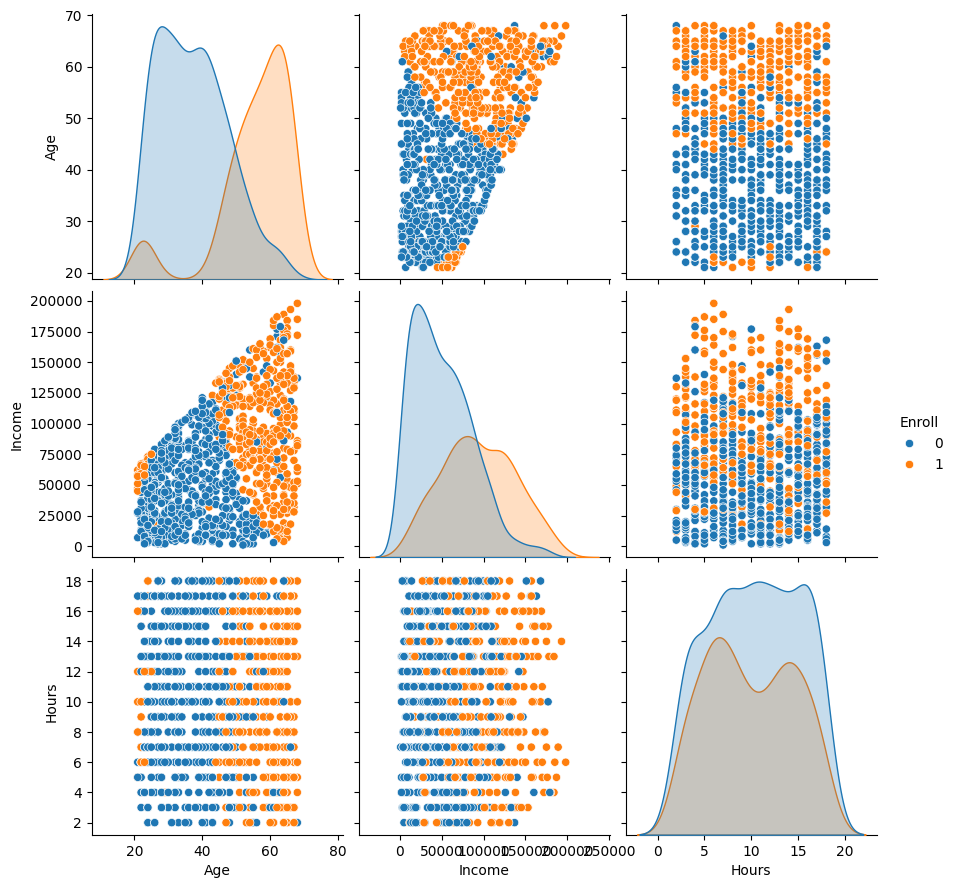

In [ ]:
nxl='/content/drive/MyDrive/Analitica de Negocios/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna() #Borra las celdas vacias
XDB.head(100)

XDB=XDB[['Age', 'Income', 'Hours','Enroll']]

sns.pairplot(XDB, hue='Enroll', size=3,vars=['Age', 'Income', 'Hours'])

#Para confirmar la buena correlacion
corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

#Se procede con la configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:3])      #Toma las variables de entrada
yd=np.array(XDB.iloc[:,3])        #Enroll

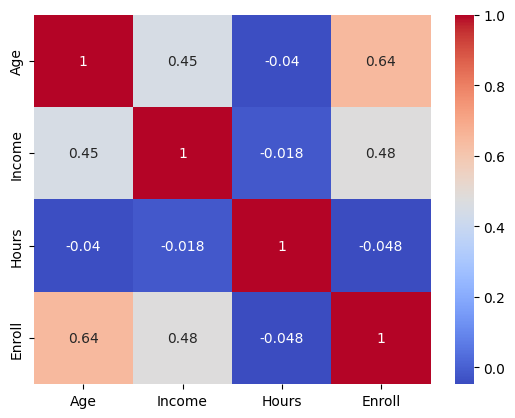

In [ ]:
#Grafico de la matriz de correlación entre las variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

2. Implementación del modelo

Esta es la matriz de confusion:
 [[538  59]
 [145 258]]
La Exactitud es: 0.796
La Sensibilidad es: 0.6401985111662531
La Especificidad es: 0.9011725293132329


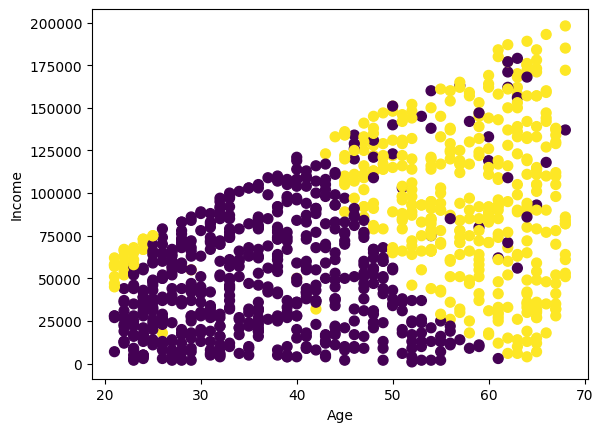

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 Vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusion:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Esp=VN/(VN+FP)
print("La Exactitud es:",Exac)
print("La Sensibilidad es:",Sen)
print("La Especificidad es:",Esp)

#Las graficas siempre se hacen con las variables que tienen mas correlación
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

3. Persona Especifica

Esta persona va a comprar la membresia? [0]


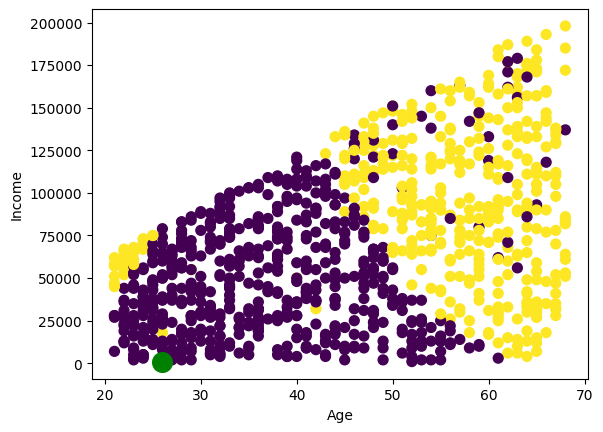

Esta persona es muy probable que no compre la membresia


In [ ]:
#Modelo con una persona especifica
XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print("Esta persona va a comprar la membresia?",ydpp)

#Las graficas siempre se hacen con las variables que tienen mas correlación
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=200,facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()
print("Esta persona es muy probable que no compre la membresia")

4. Construccion del K-means (Montoncitos de datos - Clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo el primer solicitante 0
Donde quedo el segundo solicitante 0
Donde quedo el tercer solicitante 3


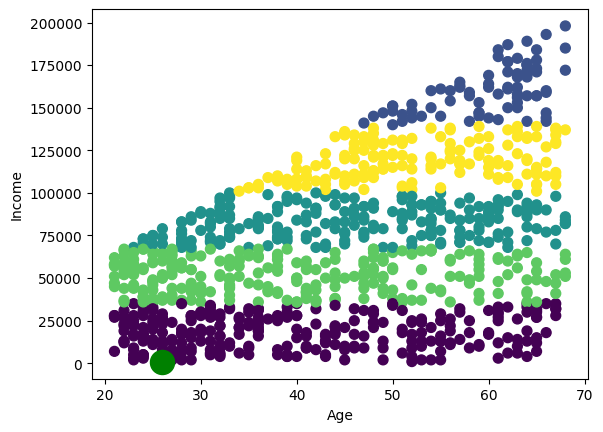

En que cluster esta? [0]
El número de personas que no compraron la membresia para el cluster 0 es: 238
El número de personas que compraron la membresia para el cluster 0 es: 45
El porcentaje de personas que no compraron la membresia para el cluster 0 es: 0.8409893992932862
El porcentaje de personas que compraron la membresia para el cluster 0 es: 0.15901060070671377
El número de personas que no compraron la membresia para el cluster 1 es: 13
El número de personas que compraron la membresia para el cluster 1 es: 64
El porcentaje de personas que no compraron la membresia para el cluster 1 es: 0.16883116883116883
El porcentaje de personas que compraron la membresia para el cluster 1 es: 0.8311688311688312
El número de personas que no compraron la membresia para el cluster 2 es: 123
El número de personas que no compraron la membresia para el cluster 2 es: 106
El porcentaje de personas que no compraron la membresia para el cluster 2 es: 0.537117903930131
El porcentaje de personas que compra

In [ ]:
np.random.seed(77) #Para que a todos nos de el mismo modelo

mkm=KMeans(n_clusters=5,init='random',random_state=77) #5 Clusters o montoncitos de datos
mkm.fit(XD,yd)
labels=mkm.labels_ #Donde quedaron clasificados cada uno de los solicitantes de créditos
print("Donde quedo el primer solicitante",labels[0,])
print("Donde quedo el segundo solicitante",labels[1,])
print("Donde quedo el tercer solicitante",labels[2,])

#Mapeo de los clusters - Como quedaron clasificados los solicitantes
plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=300,facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

#Donde quedó el personaje especifico?
XDP=np.array([[26,800,15]])
ydpp2=mkm.predict(XDP)
print("En que cluster esta?",ydpp2)

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 0
c00=len(np.where((labels==0) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 0 es:",c00)
c01=len(np.where((labels==0) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 0 es:",c01)
print("El porcentaje de personas que no compraron la membresia para el cluster 0 es:",c00/(c00+c01))
print("El porcentaje de personas que compraron la membresia para el cluster 0 es:",c01/(c00+c01))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 1
c10=len(np.where((labels==1) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 1 es:",c10)
c11=len(np.where((labels==1) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 1 es:",c11)
print("El porcentaje de personas que no compraron la membresia para el cluster 1 es:",c10/(c10+c11))
print("El porcentaje de personas que compraron la membresia para el cluster 1 es:",c11/(c10+c11))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 2
c20=len(np.where((labels==2) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 2 es:",c20)
c21=len(np.where((labels==2) & (yd==1))[0])
print("El número de personas que no compraron la membresia para el cluster 2 es:",c21)
print("El porcentaje de personas que no compraron la membresia para el cluster 2 es:",c20/(c20+c21))
print("El porcentaje de personas que compraron la membresia para el cluster 2 es:",c21/(c20+c21))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 3
c30=len(np.where((labels==3) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 3 es:",c30)
c31=len(np.where((labels==3) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 3 es:",c31)
print("El porcentaje de personas que no compraron la membresia para el cluster 3 es:",c30/(c30+c31))
print("El porcentaje de personas que compraron la membresia para el cluster 3 es:",c31/(c30+c31))

#Cual es el procentaje de personas que compraron la membresia y los que no del cluster 4
c40=len(np.where((labels==4) & (yd==0))[0])
print("El número de personas que no compraron la membresia para el cluster 4 es:",c40)
c41=len(np.where((labels==4) & (yd==1))[0])
print("El número de personas que compraron la membresia para el cluster 4 es:",c41)
print("El porcentaje de personas que no compraron la membresia para el cluster 4 es:",c40/(c40+c41))
print("El porcentaje de personas que compraron la membresia para el cluster 4 es:",c41/(c40+c41))



#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkm.cluster_centers_
print("Las caracteristicas sociodemograficas de cada cluster:\n",clusters)

In [ ]:
# Encuentra el índice del cluster con la mayor edad
indice_mayor_edad = np.argmax(clusters[:, 0])
print("El cluster con mayor edad es el cluster", indice_mayor_edad)

# Encuentra el índice del cluster con la mayor ingresos
indice_mayor_ingresos = np.argmax(clusters[:, 1])
print("El cluster con mayor ingresos es el cluster", indice_mayor_ingresos)

# Encuentra el índice del cluster con la mayor numero de horas
indice_mayor_horas = np.argmax(clusters[:, 2])
print("El cluster con mayor horas es el cluster", indice_mayor_horas)

El cluster con mayor edad es el cluster 1
El cluster con mayor ingresos es el cluster 1
El cluster con mayor horas es el cluster 2


**Variables**

Las variables a utilizar en la base de datos son la edad, los ingresos de las personas, las horas que pasan en promedio en el gimnasio y si compraron la membresia o no.

**Analisis de los datos**

Segun los datos encontrados por el modelo realizado se puede decir que la variable que mejor ayuda a determinar si la persona compro o no la membresia es la edad esto se puede decir gracias a las graficas encontradas. Ademas las variables que mejor correlación tienen son la edad y los ingresos, teniendo una correlación baja pero entre las evaluadas es la más alta. El modelo KNN arrojo una exactitud de aproximadamente 79%, una sensibilidad del 64% y una especificidad de 90%; la exactitud tiene un buen valor debido a que esta por encima del 75%, pero la sensibilidad tiene un porcentaje medianamente alto.Con respecto al personaje especifico evaluado el modelo arrojo que esta persona no compró la membresia; este hace parte del grupo de los que no compraron la membresia losm cuales en la grafica son de color morado y en el modelo de k-means hace parte del cluster 0 osea el primer cluster de abajo. Y se puede decir que el cluster que tiene mayor edad es el 1, el que tiene mayor ingresos es el 1, y el que tiene mayor numero de horas es el 2.

